import pandas as pd
import numpy as np
import multiprocessing as mp

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [350]:
class Kmeans:
    """
    KMeans algorithm:
    * initialization: assigns random positions to clusters given mean
    and standard deviation of data
    """
    def __init__(self,n_clusters=5,epsilon=0.01):
        self.n_clusters=n_clusters
        self.epsilon=epsilon
        # position centers for each iteration
        self.centers_pos=[]
        # centers positions: clusters_centers[i]=(x,y) for center i
        self.clusters_centers=None
        
    def fit(self,x):
        std_dev=x.std(0)
        #pick N random data-points
        idx=np.random.choice(np.arange(x.shape[0]),self.n_clusters,replace=False)
        #initialize center positions
        self.clusters_centers=x[idx]+std_dev
        self.clusters=[]
        
        not_converged=True
        while not_converged:
            self.centers_pos.append(self.clusters_centers)
            # calculate new
            new_centers=self.newpos(x)
            dev=new_centers-self.clusters_centers
            self.clusters_centers=new_centers
            dev=(dev*dev).sum(1)
            dev=np.sqrt(dev)
            if (dev>=self.epsilon).sum()==0:
                not_converged=False
                print('Converged')
    
    #determine new means given clusters
    def newpos(self,x):
        distances=[]
        for x_cl in self.clusters_centers:
            d=x-x_cl
            d=(d*d).sum(1)
            d=np.sqrt(d)
            distances.append(d.reshape(-1,1))
        distances=np.concatenate(distances,axis=1)
        self.clusters=distances.argmin(1)
        
        #re-evaluate cluster centers
        centers=self.clusters_centers.copy()
        for i in range(self.n_clusters):
            idx=(self.clusters==i)
            if idx.sum()!=0:
                new_center=x[idx].mean(0)
                centers[i]=new_center
        
        return centers

In [330]:
N=4
centers=np.random.normal(0,6,(N,2))
xs=[]
xcenters=np.zeros((100*N,2))
for c,i in zip(centers,range(5)):
    a,b=c
    x=c+np.random.normal(0,1,(100,2))
    xcenters[i*100:100*(i+1),:]=c
    xs.append(x)

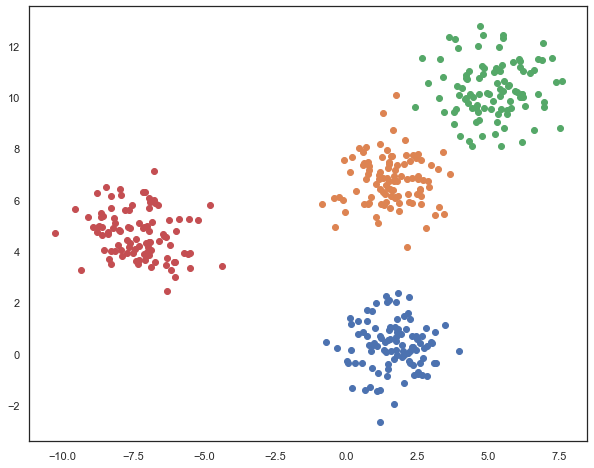

In [351]:
plt.figure(figsize=(10,8))
for x in xs:
    plt.scatter(x[:,0],x[:,1])

In [332]:
xs_all=np.concatenate(xs)

In [357]:
kmeans=Kmeans(N,0.01)

In [358]:
kmeans.fit(xs_all)

Converged


In [359]:
kmeans.clusters_centers

array([[-7.34640791,  4.66366175],
       [ 1.58132624,  6.76305748],
       [ 5.16222449, 10.31576608],
       [ 1.65431719,  0.30664359]])

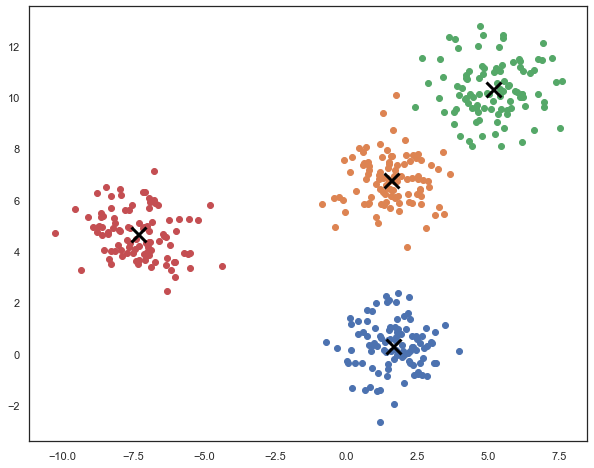

In [367]:
sns.set_style("white")

plt.figure(figsize=(10,8))
for x in xs:
    plt.scatter(x[:,0],x[:,1])
for c in kmeans.clusters_centers:
    plt.plot(c[0],c[1],marker='x',markersize=15,color='black',mew=3)

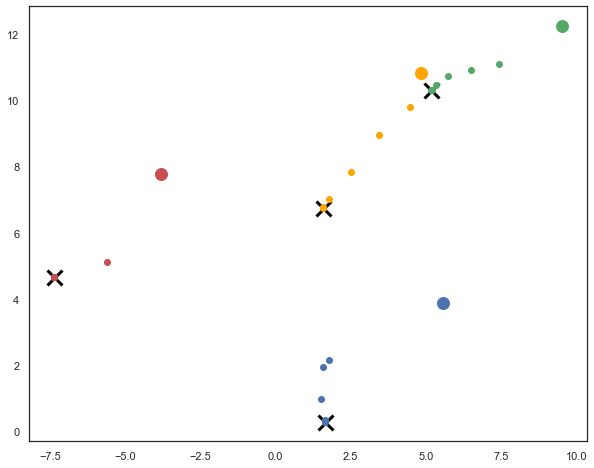

In [366]:
plt.figure(figsize=(10,8))

for c in kmeans.clusters_centers:
    plt.plot(c[0],c[1],marker='x',markersize=15,color='black',mew=3)
    
mew=3
markersize=10
for xset in kmeans.centers_pos:
    for p,c in zip(xset,['r','orange','g','b']):
        plt.plot(p[0],p[1],marker='o',color=c,mew=mew,markersize=markersize)
    mew=1
    markersize=6

In [362]:
kmeans.clusters

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,

In [363]:
kmeans.clusters_centers

array([[-7.34640791,  4.66366175],
       [ 1.58132624,  6.76305748],
       [ 5.16222449, 10.31576608],
       [ 1.65431719,  0.30664359]])